# Outliers in Glass dataset

Outlier mining is an important task in data analysis. In this capstone project I would like to prezent an analysis for a Glass dataset. 

Glass i a forensic dataset describing types of glass. This version is based on a publication by Keller et al. (HiCS, [1]). The authors use the class 6 (minority) as outlier and all other classes as inliers. Unfortunately, they do not detail which attributes have been used. The original dataset consists of 9 attributes, here are only 7 attributes present. The dataset contains 214 instances, 9 outliers (4.21%) and 205 inliers (95.79%). This dataset contains only one duplicate, so we did not create a version without duplicates.

Source:

https://www.dbs.ifi.lmu.de/research/outlier-evaluation/DAMI/literature/Glass/

References:

[1] F. Keller, E. Mueller, and K. Boehm. HiCS: high contrast subspaces for density-based outlier ranking. In Proc. ICDE, 2012. http://data.bit.uni-bonn.de/publications/ICDE2012.pdf

Comparison of Different Classification Methods on Glass Identification for Forensic Research: http://www.davidpublisher.com/Public/uploads/Contribute/56f9de9b67f83.pdf

# Download data

In [1]:
# # download data from Database Group, Ludwig-Maximilians-Universität München
# !wget https://www.dbs.ifi.lmu.de/research/outlier-evaluation/input/Glass.tar.gz
# # unpack data
# !tar -xzf Glass.tar.gz 
# !ls Glass
# # remove first lines from source file and save it as glass.csv
# !head -n 20 Glass/Glass_withoutdupl_norm.arff
# !tail -n +14 Glass/Glass_withoutdupl_norm.arff > glass.csv

In [45]:
# download original version of dataset
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.names
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.tag

--2019-09-24 17:27:17--  https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11903 (12K) [application/x-httpd-php]
Saving to: ‘glass.data.1’

100%[======================================>] 11,903      --.-K/s   in 0s      

2019-09-24 17:27:18 (82.1 MB/s) - ‘glass.data.1’ saved [11903/11903]

--2019-09-24 17:27:19--  https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3506 (3.4K) [application/x-httpd-php]
Saving to: ‘glass.names.1’

100%[======================================>] 3,506       --.-K/s   in 0s      

2019-0

In [46]:
!cat glass.names

1. Title: Glass Identification Database

2. Sources:
    (a) Creator: B. German
        -- Central Research Establishment
           Home Office Forensic Science Service
           Aldermaston, Reading, Berkshire RG7 4PN
    (b) Donor: Vina Spiehler, Ph.D., DABFT
               Diagnostic Products Corporation
               (213) 776-0180 (ext 3014)
    (c) Date: September, 1987

3. Past Usage:
    -- Rule Induction in Forensic Science
       -- Ian W. Evett and Ernest J. Spiehler
       -- Central Research Establishment
          Home Office Forensic Science Service
          Aldermaston, Reading, Berkshire RG7 4PN
       -- Unknown technical note number (sorry, not listed here)
       -- General Results: nearest neighbor held its own with respect to the
             rule-based system

4. Relevant Information:n
      Vina conducted a comparison test of her rule-based system, BEAGLE, the
      nearest-neighbor algorithm, and discriminant analysis.  BEAGLE is 
      a product available 

In [4]:
!cat glass.tag

An original file donated by Vina Speihler

ID, N    -- numeric identifier of the instance
RI, N    -- refractive index
NA2O, N  -- Sodium oxide
MGO, N   -- magnesium oxide
AL2O3, N -- aluminum oxide
SIO2, N  -- silcon oxide
K2O,  N  -- potassium oxide
CAO, N   -- calcium oxide
BAO, N   -- barium oxide
FE2O3, N -- iron oxide
TYPE, N  -- An unknown, but must correspond to the types in the paper
CAMG, N  -- Unsure

Types include:
  1. WF (Float Window)
  2. WNF (Non-float Window)
  3. C (Container)
  4. T (Tableware)
  5. H (Headlamp)     214    2568   14127 glass.dat
      19      92     518 glass.tag
      62     742    4775 glassx.dat
      51     610    3928 nonwindo.dat
       6      14     120 phones
     163    1955   12552 window.dat
     515    5981   36020 total


In [5]:
!head glass.data

1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.00,1
8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.00,1
9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.00,0.00,1
10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11,1


In [6]:
# !pip freeze

In [7]:
# copy pip freeze output here to install all necessary packages
requiments = '''Keras==2.2.4
livelossplot==0.4.1
matplotlib==3.0.2
numpy==1.15.4
pandas==0.24.1
pixiedust==1.1.17
seaborn==0.9.0
scikit-learn==0.21.3'''
with open('req.txt', 'w') as f:
    f.writelines(requiments)
!pip install -r req.txt

     |████████████████████████████████| 6.7MB 23.5MB/s eta 0:00:01
     |████████████████████████████████| 286kB 48.3MB/s eta 0:00:01
ERROR: autoai-libs 1.10.1 has requirement numpy>=1.16.4, but you'll have numpy 1.15.4 which is incompatible.
ERROR: autoai-libs 1.10.1 has requirement pandas>=0.24.2, but you'll have pandas 0.24.1 which is incompatible.
ERROR: autoai-libs 1.10.1 has requirement scikit-learn==0.20.3, but you'll have scikit-learn 0.21.3 which is incompatible.
  Found existing installation: scikit-learn 0.20.3
    Uninstalling scikit-learn-0.20.3:
      Successfully uninstalled scikit-learn-0.20.3


In [47]:
import numpy as np
import pandas as pd
import pixiedust
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
from collections import Counter
from keras import regularizers
from keras.layers import Input, Dense
from keras.models import Model
from livelossplot.keras import PlotLossesCallback
from sklearn import decomposition, preprocessing, svm, tree
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report, precision_recall_fscore_support, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import LocalOutlierFactor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC, LinearSVC

# Read & preview the dataset

In [ ]:
# read input file
input_file = 'glass.data'
df = pd.read_csv(input_file, header=None, quotechar="'")
# add column names
df.columns = ['id', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'class']
features = ['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9']
# mark class 6 as outliers (True) and other as inliers (False)
df.loc[df['class'] !=6, 'class'] = 0
df.loc[df['class'] ==6, 'class'] = 1
df['class'] = df['class'].astype('bool')
display(df)

id,v1,v2,v3,v4,v5,v6,v7,v8,v9,class
201,1.51508,15.15,0.0,2.25,73.5,0.0,8.34,0.63,0.0,False
13,1.51589,12.88,3.43,1.4,73.28,0.69,8.05,0.0,0.24,False
64,1.52227,14.17,3.81,0.78,71.35,0.0,9.69,0.0,0.0,False
167,1.5215100000000001,11.03,1.71,1.56,73.44,0.58,11.62,0.0,0.0,False
185,1.51115,17.38,0.0,0.34,75.41,0.0,6.65,0.0,0.0,True
34,1.5175299999999998,12.57,3.47,1.38,73.39,0.6,8.55,0.0,0.06,False
91,1.51841,12.93,3.74,1.11,72.28,0.64,8.96,0.0,0.22,False
175,1.5205799999999998,12.85,1.61,2.17,72.18,0.76,9.7,0.24,0.51,False
120,1.51652,13.56,3.57,1.47,72.45,0.64,7.96,0.0,0.0,False
127,1.51667,12.94,3.61,1.26,72.75,0.56,8.6,0.0,0.0,False


In [49]:
df.describe()

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,54.250000,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [50]:
df.dtypes

id         int64
v1       float64
v2       float64
v3       float64
v4       float64
v5       float64
v6       float64
v7       float64
v8       float64
v9       float64
class       bool
dtype: object

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
id       214 non-null int64
v1       214 non-null float64
v2       214 non-null float64
v3       214 non-null float64
v4       214 non-null float64
v5       214 non-null float64
v6       214 non-null float64
v7       214 non-null float64
v8       214 non-null float64
v9       214 non-null float64
class    214 non-null bool
dtypes: bool(1), float64(9), int64(1)
memory usage: 17.0 KB


In [52]:
df['class'].value_counts()

False    205
True       9
Name: class, dtype: int64

# Dataset visualizations

In [53]:
# plot each feature and highlight outliers + histogram + boxplot
def plot_dataset(df):
    for v in features:
        plt.figure(figsize=(15,5))
        ax1=plt.subplot(1, 3, 1)
        plt.plot(df['id'], df[v],'.', label='inlier')
        x = df[v].to_numpy(copy=True)
        x[~df['class']] = np.nan
        plt.plot(df['id'], x,'ro',label='outlier')
        plt.legend(loc='upper left')
        plt.title(v)
        ax2=plt.subplot(1, 3, 2)
        # histogram
        plt.hist(df[v], bins = 13)
        plt.title('hist of '+v)
        # display skewness & kurtosis
        at = AnchoredText('skew = {:.2f}\nkurtosis = {:.2f}'.format(df[v].skew(), df[v].kurtosis()),
                      prop=dict(size=10), frameon=True,
                      loc='upper right',
                      )
        ax2.add_artist(at)
        ax3=plt.subplot(1, 3, 3)
        # boxplot
        plt.boxplot(df[v])
        plt.title('boxplot for '+v)

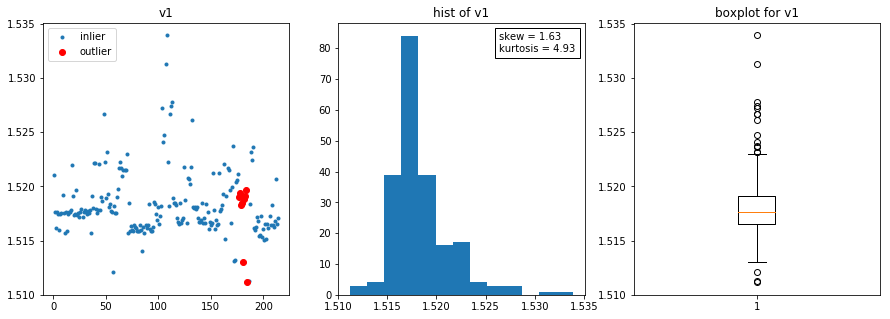

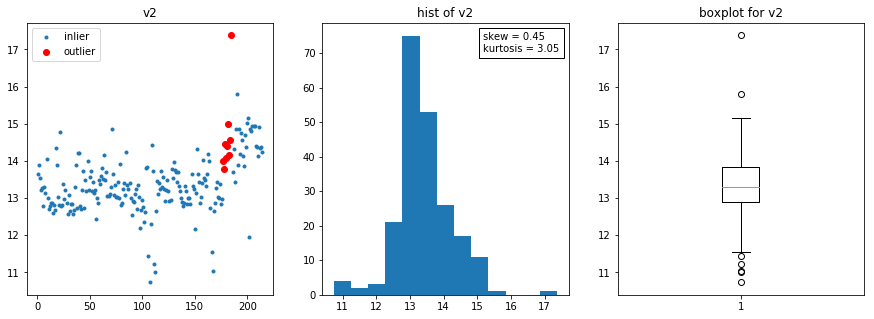

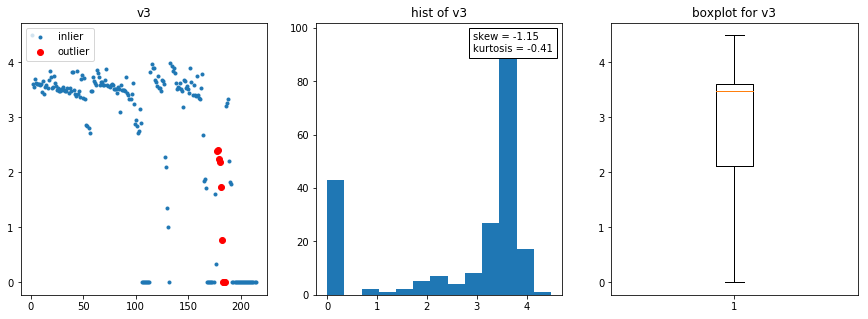

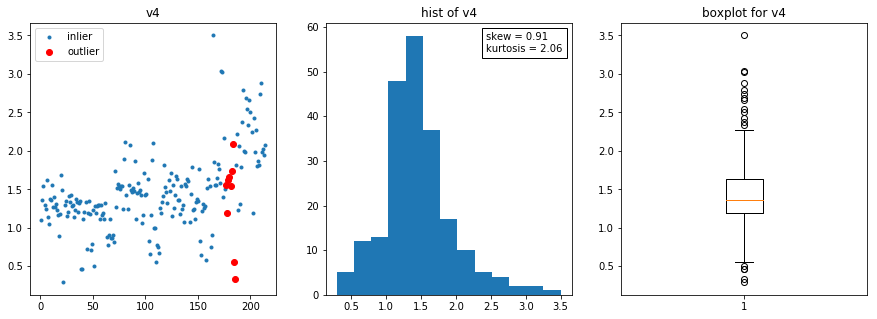

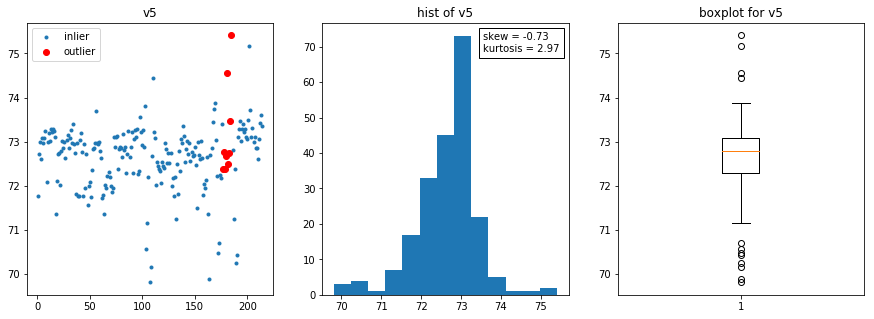

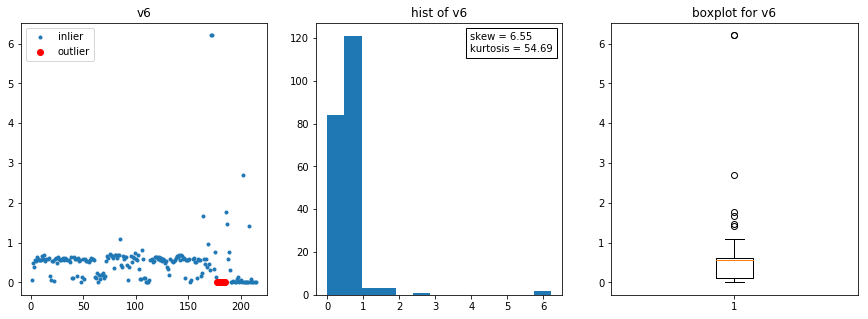

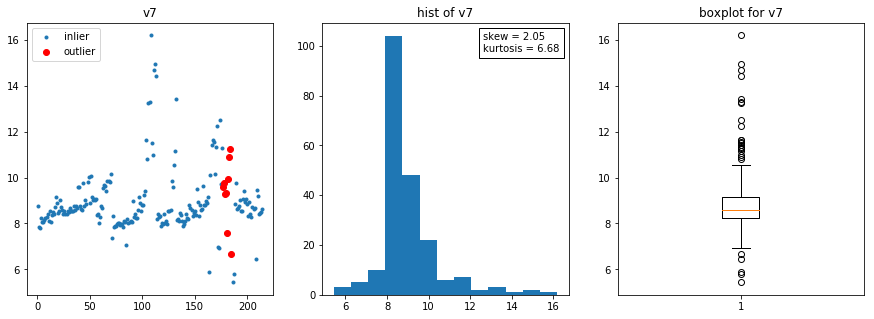

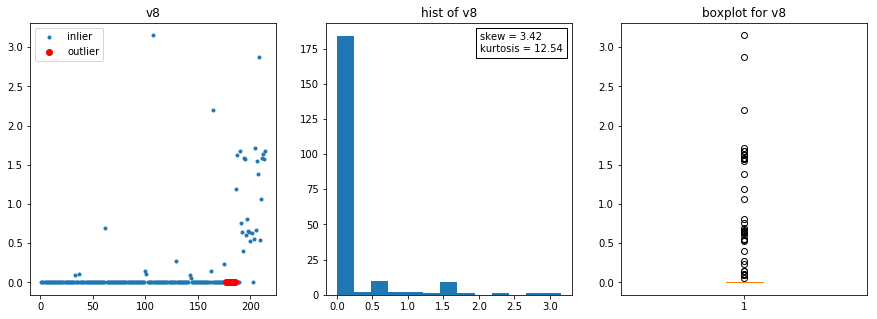

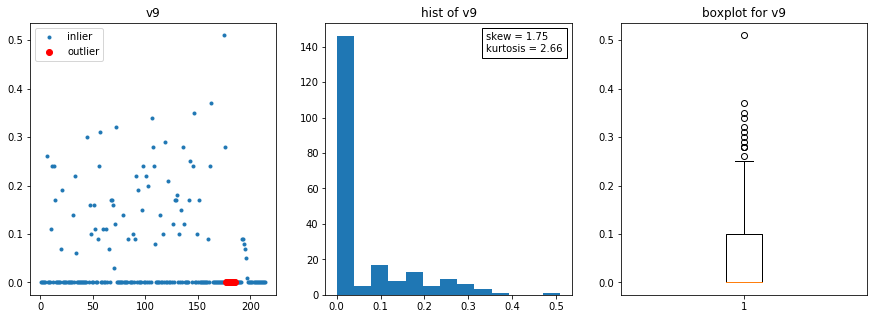

In [54]:
plot_dataset(df)

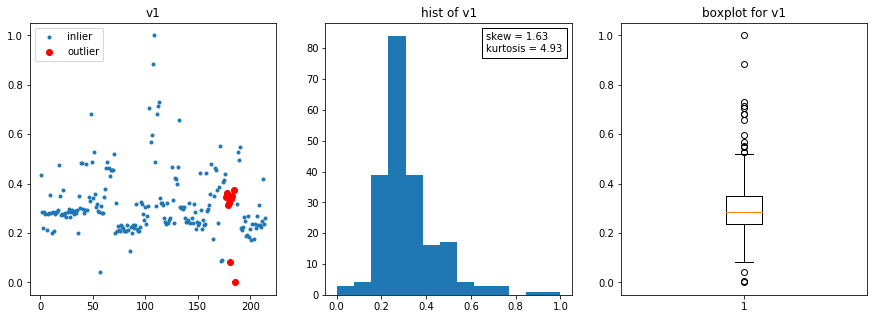

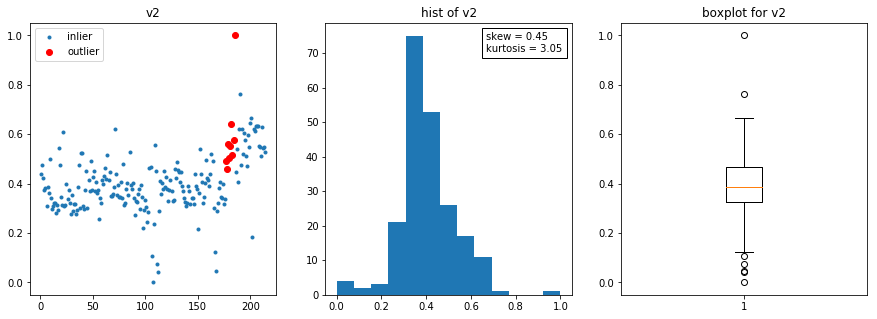

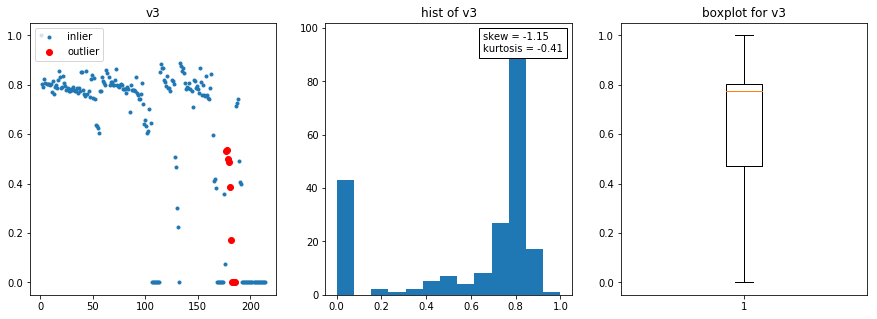

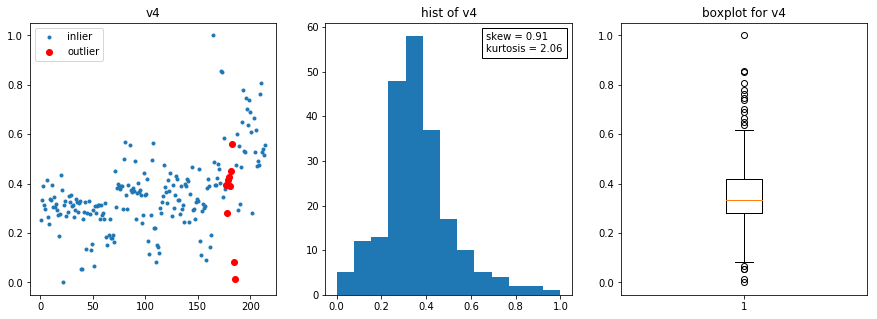

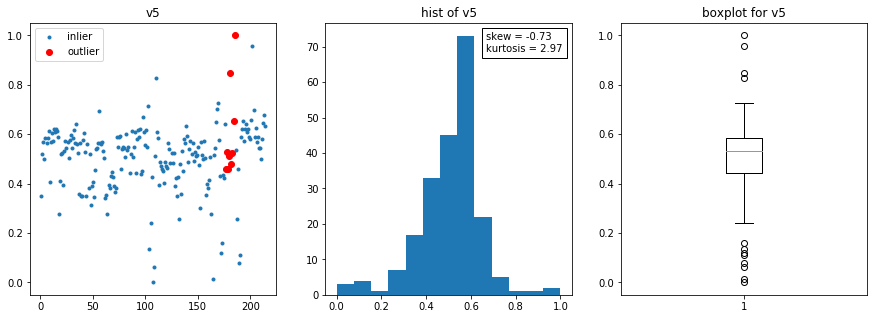

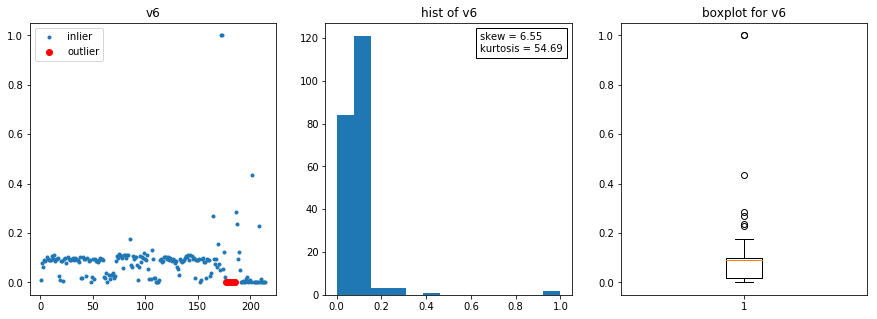

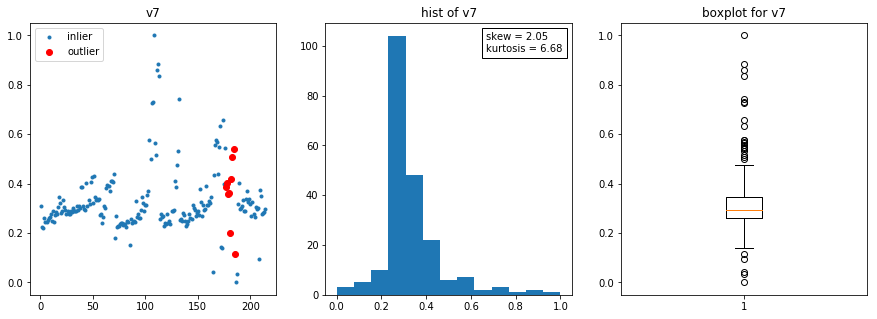

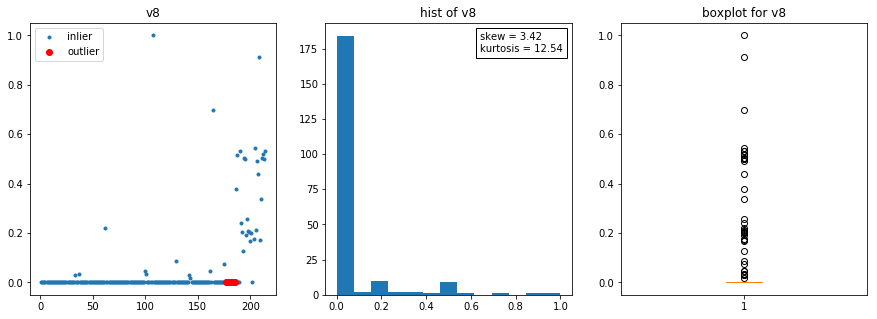

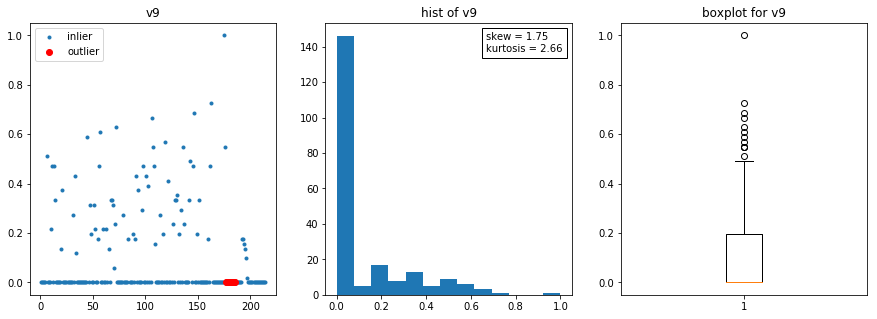

In [55]:
# scale data
# we could try to remove skewness by means of e.g. power transform like Box Cox https://en.wikipedia.org/wiki/Power_transform
for f in features:
    df[f] = df[f]-df[f].min()
    df[f] = df[f]/df[f].max()
plot_dataset(df)

<Figure size 576x576 with 0 Axes>

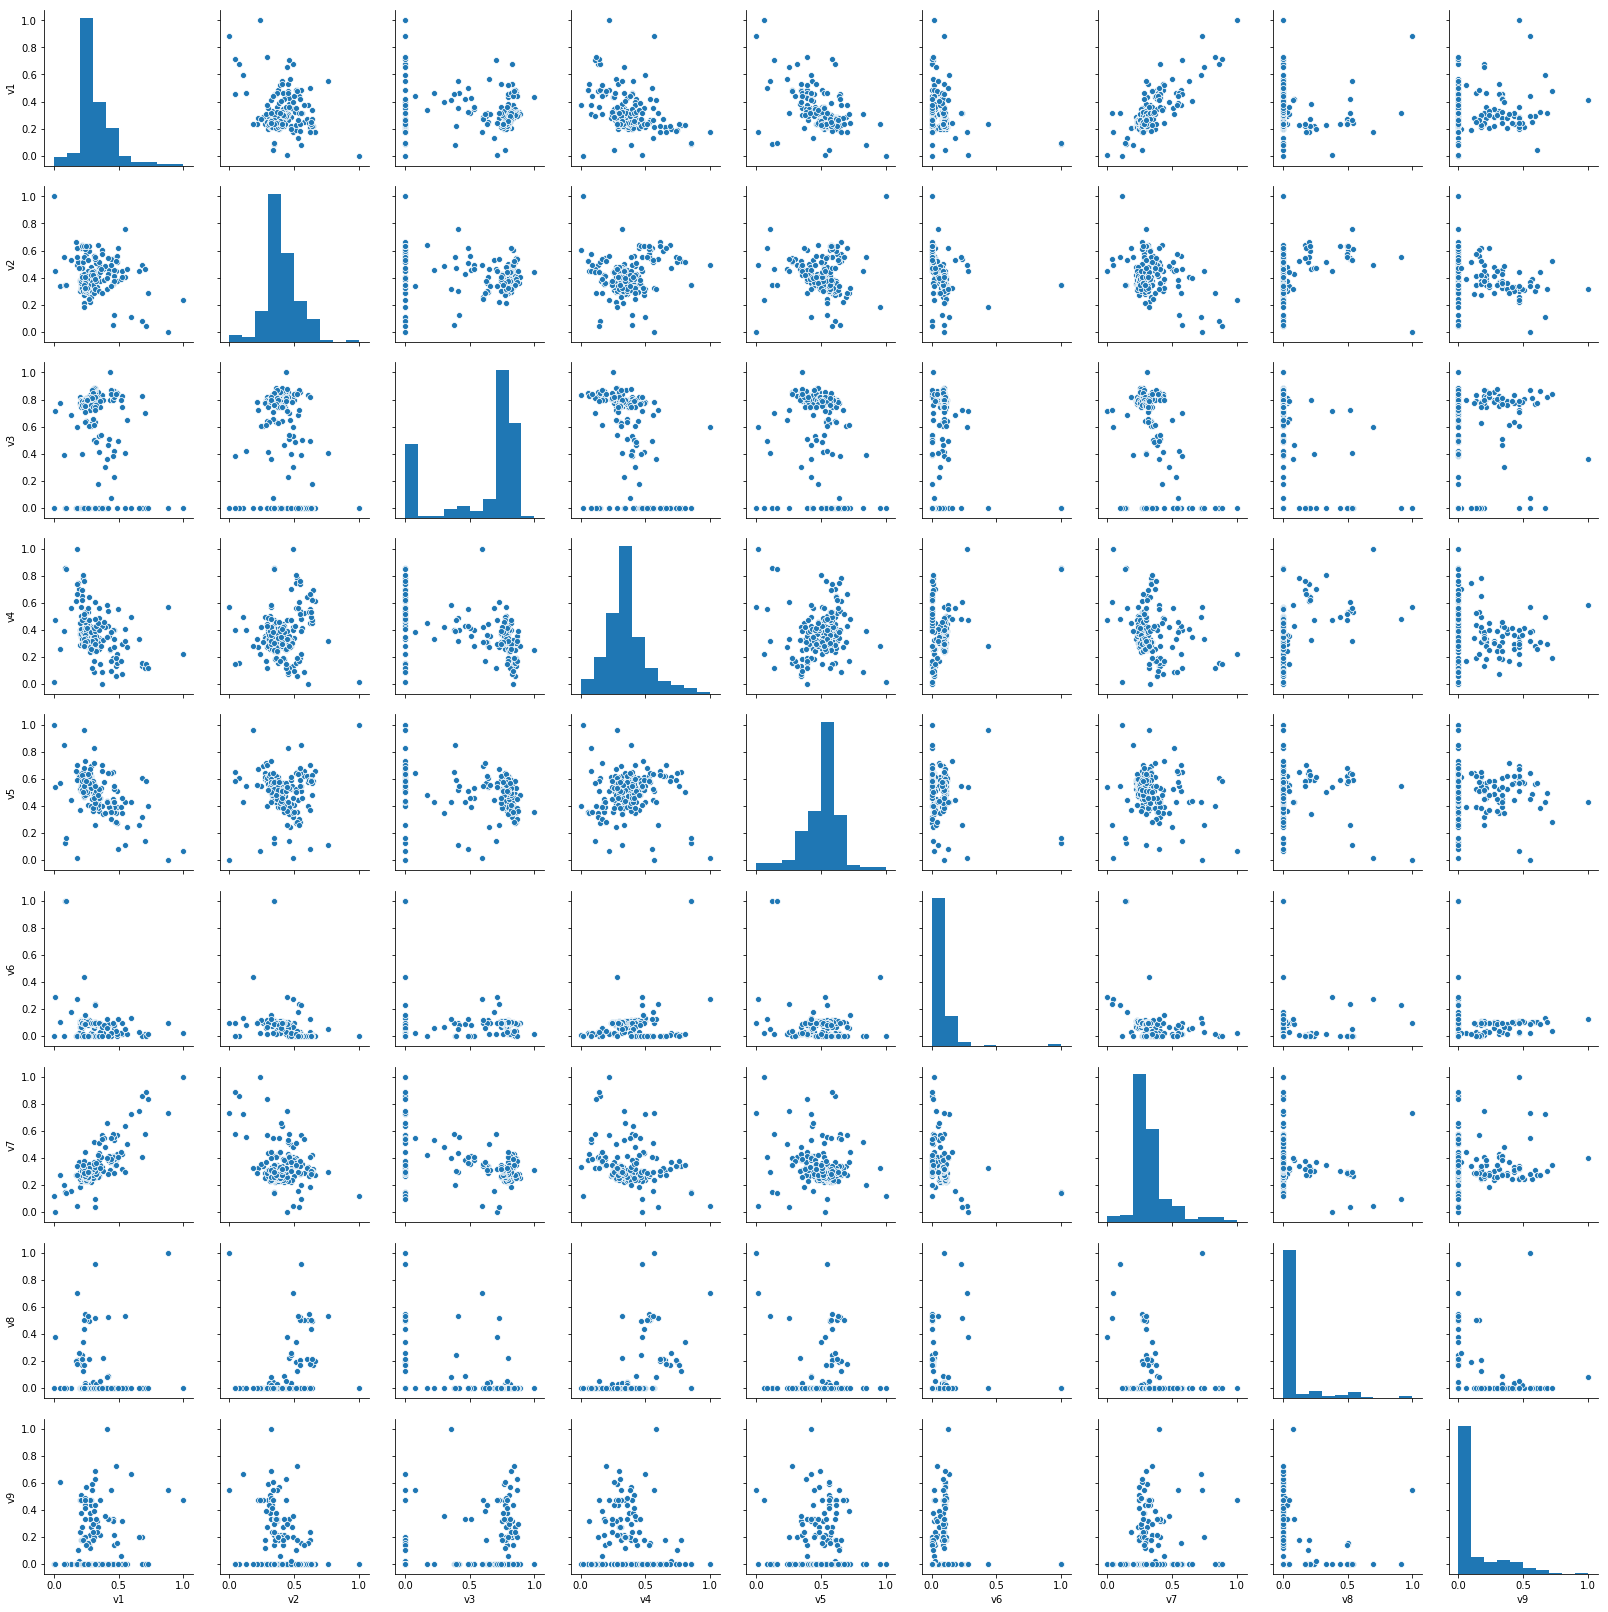

In [56]:
# Plot pairwise relationships in a dataset.
plt.figure(figsize=(8,8))
sns.pairplot(df[features],palette='coolwarm')
plt.show()

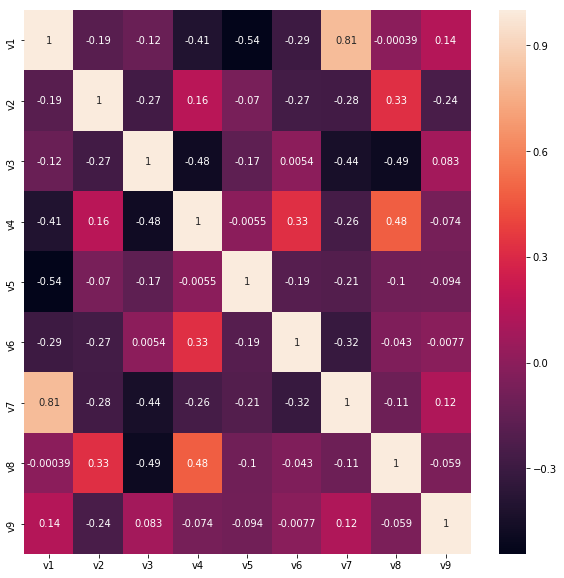

In [57]:
# feature correlation map
Var_Corr = df[features].corr()
# plot the heatmap and annotation on it
plt.figure(figsize=(10,10))
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

Text(0.5, 1.0, 'PCA visualization')

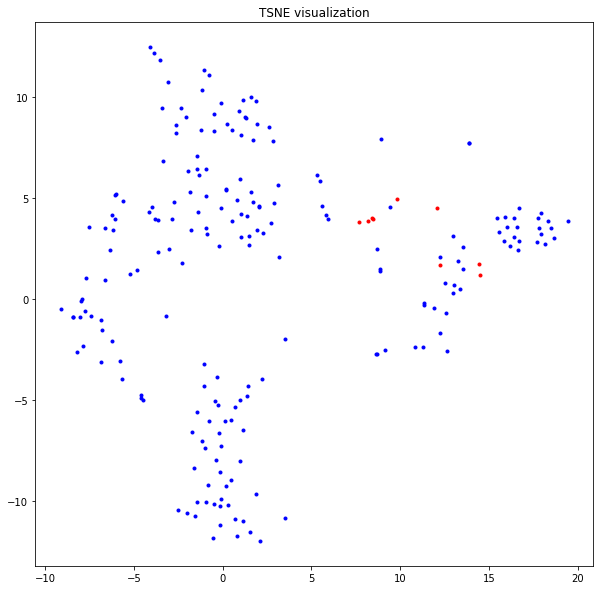

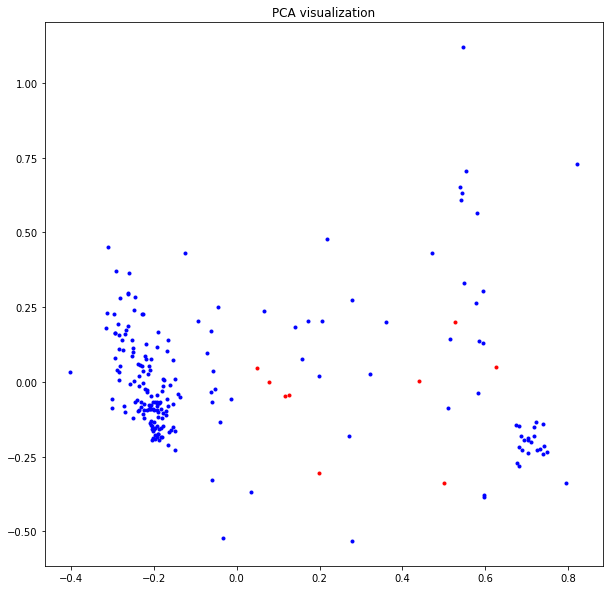

In [58]:
# reduce dimnesionality by means of t-SNE & PCA to have outlook of whole dataset
# https://lvdmaaten.github.io/tsne/
X = df[features].to_numpy(copy=True)
X_embedded = TSNE(n_components=2, n_iter=2000, perplexity=30).fit_transform(X)
plt.figure(figsize=(10,10))
plt.plot(X_embedded[~df['class'],0],X_embedded[~df['class'],1],'b.')
plt.plot(X_embedded[df['class'],0],X_embedded[df['class'],1],'r.')
plt.title('TSNE visualization')
#  PCA
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)
plt.figure(figsize=(10,10))
plt.plot(X_pca[~df['class'],0],X_pca[~df['class'],1],'b.')
plt.plot(X_pca[df['class'],0],X_pca[df['class'],1],'r.')
plt.title('PCA visualization')

# Classification attempt

In [59]:
# SVM with RBF kernel
clf = SVC(gamma='auto')
y = df['class']
target_names = ['inlier', 'outlier']
clf.fit(X, y) 
y_pred = clf.predict(X)
print('SVM output:')
print(classification_report(y, y_pred, target_names=target_names))

SVM output:
              precision    recall  f1-score   support

      inlier       0.96      1.00      0.98       205
     outlier       0.00      0.00      0.00         9

    accuracy                           0.96       214
   macro avg       0.48      0.50      0.49       214
weighted avg       0.92      0.96      0.94       214



/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [60]:
# linear SVM
clf = LinearSVC()
clf.fit(X, y) 
y_pred = clf.predict(X)
print('SVM output:')
print(classification_report(y, y_pred, target_names=target_names))

SVM output:
              precision    recall  f1-score   support

      inlier       0.96      1.00      0.98       205
     outlier       1.00      0.11      0.20         9

    accuracy                           0.96       214
   macro avg       0.98      0.56      0.59       214
weighted avg       0.96      0.96      0.95       214



In [61]:
# polynomial features 
poly = PolynomialFeatures(interaction_only=True)
X_poly = poly.fit_transform(X)

In [62]:
# linear SVM for polynomial features
clf = LinearSVC()
clf.fit(X_poly, y) 
y_pred = clf.predict(X_poly)
print('SVM output for polynomial feauters:')
print(classification_report(y, y_pred, target_names=target_names))

SVM output for polynomial feauters:
              precision    recall  f1-score   support

      inlier       0.96      1.00      0.98       205
     outlier       1.00      0.11      0.20         9

    accuracy                           0.96       214
   macro avg       0.98      0.56      0.59       214
weighted avg       0.96      0.96      0.95       214



In [63]:
def find_best_svm(features, labels):
    # Grid search via pipeline for SVM
    steps = [('SVM', SVC())]
    pipeline = Pipeline(steps) # define the pipeline object.
    X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size=0.2, random_state=30)
    parameteres = {'SVM__C':[0.001,0.01,0.1,10,100,10e5], 'SVM__gamma':[0.3,0.2,0.1,0.01]}
    grid = GridSearchCV(pipeline, param_grid=parameteres, cv=5, iid=True)
    grid.fit(X_train, y_train)
    print("score = %3.2f" %(grid.score(X_test,y_test)))
    print(grid.best_params_)
    print(classification_report(y_test, grid.predict(X_test)))

In [64]:
# find best classifier for original features
find_best_svm(X, y)

score = 0.98
{'SVM__C': 100, 'SVM__gamma': 0.2}
              precision    recall  f1-score   support

       False       0.98      1.00      0.99        41
        True       1.00      0.50      0.67         2

    accuracy                           0.98        43
   macro avg       0.99      0.75      0.83        43
weighted avg       0.98      0.98      0.97        43



In [66]:
# find best classifier for polynomial features
find_best_svm(X_poly, y)

score = 0.95
{'SVM__C': 100, 'SVM__gamma': 0.1}
              precision    recall  f1-score   support

       False       0.95      1.00      0.98        41
        True       0.00      0.00      0.00         2

    accuracy                           0.95        43
   macro avg       0.48      0.50      0.49        43
weighted avg       0.91      0.95      0.93        43



/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Anomaly detection algorithms
Based on https://scikit-learn.org/stable/auto_examples/plot_anomaly_comparison.html
* Robust covariance
* One-Class SVM
* Isolation Forest
* Local Outlier Factor

In [67]:
n_outliers = sum(df['class'])
n_inliers = len(df) - n_outliers
outliers_fraction = n_outliers/(n_outliers + n_inliers)
# define outlier/anomaly detection methods to be compared
anomaly_algorithms = [
    ("Robust covariance", EllipticEnvelope(contamination=outliers_fraction)),
    ("One-Class SVM", svm.OneClassSVM(nu=outliers_fraction, kernel="rbf",
                                      gamma=10)),
    ("Isolation Forest", IsolationForest(behaviour='new',
                                         contamination=outliers_fraction,
                                         random_state=42)),
    ("Local Outlier Factor", LocalOutlierFactor(
        n_neighbors=10, contamination=outliers_fraction))]

for name, algorithm in anomaly_algorithms:
    print('=======================================')
    print(name)
    algorithm.fit(X_poly)
    # fit the data and tag outliers
    if name == "Local Outlier Factor":
        y_pred = algorithm.fit_predict(X_poly)
    else:
        y_pred = algorithm.fit(X_poly).predict(X_poly)

    if name != "Local Outlier Factor":  # LOF does not implement predict
        Z = algorithm.predict(X_poly)
    else:
        Z = algorithm.fit_predict(X_poly)
    print(classification_report(df['class'], Z==-1))


Robust covariance
              precision    recall  f1-score   support

       False       0.96      0.96      0.96       205
        True       0.11      0.11      0.11         9

    accuracy                           0.93       214
   macro avg       0.54      0.54      0.54       214
weighted avg       0.93      0.93      0.93       214

One-Class SVM
              precision    recall  f1-score   support

       False       0.97      0.82      0.89       205
        True       0.08      0.33      0.12         9

    accuracy                           0.80       214
   macro avg       0.52      0.58      0.51       214
weighted avg       0.93      0.80      0.86       214

Isolation Forest
              precision    recall  f1-score   support

       False       0.96      0.96      0.96       205
        True       0.00      0.00      0.00         9

    accuracy                           0.92       214
   macro avg       0.48      0.48      0.48       214
weighted avg       0.92  

# Autoencoder

In [68]:
# https://blog.keras.io/building-autoencoders-in-keras.html
# this is the size of encoded representations
encoding_dim = 2
# this is input placeholder
input_data = Input(shape=(X_poly.shape[1],))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu', activity_regularizer=regularizers.l1(10e-5))(input_data)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(X_poly.shape[1], activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_data, decoded)
# this model maps an input to its encoded representation
encoder = Model(input_data, encoded)
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 46)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 94        
_________________________________________________________________
dense_4 (Dense)              (None, 46)                138       
Total params: 232
Trainable params: 232
Non-trainable params: 0
_________________________________________________________________


In [69]:
# split data
# train only on healthy data, but validate on inliers and outliers
x_test = X_poly[df['class'],:]
x_train, x_val = train_test_split(X_poly[~df['class'],:], test_size=0.15)
x_test = np.concatenate((x_test,x_val[:int(x_val.shape[0]/2),:]))
x_val = x_val[int(x_val.shape[0]/2):,:]

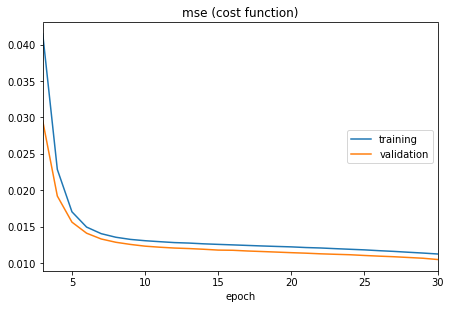

mse (cost function):
training   (min:    0.011, max:    0.150, cur:    0.011)
validation (min:    0.010, max:    0.126, cur:    0.010)


In [30]:
# train neural network
epochs = 30
batch_size = 2
autoencoder.fit(x_train, x_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(x_val, x_val),
                callbacks=[PlotLossesCallback()])

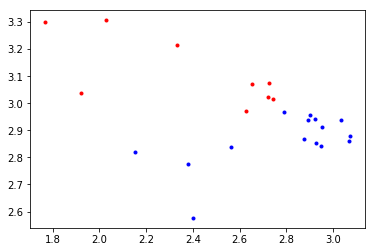

In [31]:
encoded_input = encoder.predict(x_test)
decoded_input = decoder.predict(encoded_input)
plt.plot(encoded_input[:9,0], encoded_input[:9,1],'r.')
plt.plot(encoded_input[9:,0], encoded_input[9:,1],'b.')

In [32]:
y = np.concatenate((np.ones(sum(df['class'])), np.zeros(encoded_input.shape[0]-sum(df['class']))), axis=0)
# clf = LogisticRegression(random_state=0).fit(encoded_input, y)
clf = SVC().fit(encoded_input, y)
print(classification_report(y,clf.predict(encoded_input)))
# clf.predict_proba(encoded_input)

              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86        15
         1.0       1.00      0.44      0.62         9

    accuracy                           0.79        24
   macro avg       0.88      0.72      0.74        24
weighted avg       0.84      0.79      0.77        24



/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


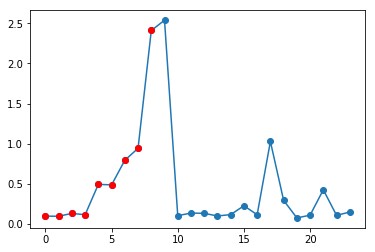

In [33]:
plt.plot(np.sum(np.power(decoded_input-x_test, 2), axis=1),'-o')
plt.plot(np.sum(np.power(decoded_input[:sum(df['class'])]-x_test[:sum(df['class'])], 2), axis=1),'ro')

1/1 [==============================] - 0s 3ms/step


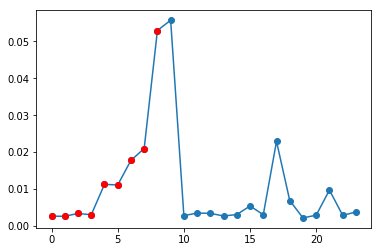

In [34]:
err = []
for x in x_test:
    err.append(autoencoder.evaluate(np.expand_dims(x,axis=0), np.expand_dims(x,axis=0)))
#     print(err)
plt.plot(err,'-o')
plt.plot(err[:sum(df['class'])],'ro')

# Decision trees

In [70]:
def train_tree_n_times(X, labels,n=1, max_depth=None, n_in = 190, n_out = 6):
    """Function for trainning tree clasifiers for glass dataset.

    Args:
        df: data with glass dataset
        labels: outlier labels (e.g. df['class'])
        n: number of trained classifiers
        max_depth: maximum depth of trained trees (see: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
        n_in: number of randomly selected inliers to train classification tree
        n_out: number of randomly selected outliers to train classification tree

    Returns:
        clfs: list of trained classifiers
        results: list of results on training set
        xx_test: test data if there was only on classifier trained
        yy_test: test labels if there was only on classifier trained

    """
    results = []
    clfs = []
    for iter in range(n):
        # prepare data         
        inliers = X[~labels,:]
        np.random.shuffle(inliers)
        outliers = X[labels,:]
        np.random.shuffle(outliers)
        xx_train = np.concatenate((inliers[:n_in,:], outliers[:n_out,:]), axis=0)
        yy_train = np.concatenate((np.zeros(n_in), np.ones(n_out)), axis=0)
        xx_test = np.concatenate((inliers[n_in:,:], outliers[n_out:,:]), axis=0)
        yy_test = np.concatenate((np.zeros(sum(~labels)-n_in), np.ones(sum(labels)-n_out)), axis=0)
        # train tree         
        clf = tree.DecisionTreeClassifier(max_depth=max_depth)
        clf = clf.fit(xx_train, yy_train)
        # append results 
        results.append(clf.predict(xx_test))
        clfs.append(clf)
    if n == 1:
        clfs = clfs[0]
        results = results[0]
    else:
        xx_test = []
        yy_test = []
    return clfs, results, xx_test, yy_test

In [78]:
# train one tree
clf, result, x_test, y_test = train_tree_n_times(X, df['class'])
print(classification_report(y_test, result))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       1.00      1.00      1.00         3

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



In [79]:
# get probabilities
clf.predict_proba(x_test)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

[Text(239.14285714285714, 195.696, 'X[5] <= 0.002\ngini = 0.059\nsamples = 196\nvalue = [190, 6]'),
 Text(191.31428571428572, 152.208, 'X[7] <= 0.089\ngini = 0.365\nsamples = 25\nvalue = [19, 6]'),
 Text(143.4857142857143, 108.72, 'X[3] <= 0.224\ngini = 0.496\nsamples = 11\nvalue = [5, 6]'),
 Text(95.65714285714286, 65.232, 'X[1] <= 0.558\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(47.82857142857143, 21.744, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(143.4857142857143, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(191.31428571428572, 65.232, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(239.14285714285714, 108.72, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(286.9714285714286, 152.208, 'gini = 0.0\nsamples = 171\nvalue = [171, 0]')]

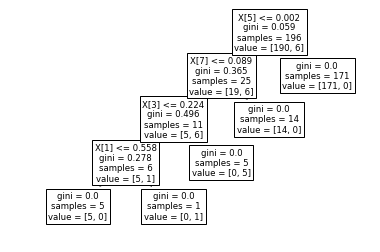

In [80]:
# plot classification tree
tree.plot_tree(clf)

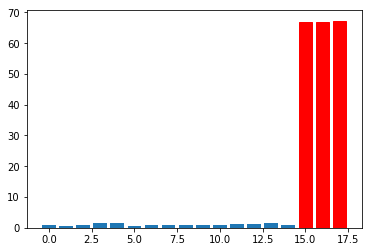

In [81]:
# ensemble of trees
clf, result, _, _ = train_tree_n_times(X, df['class'],n=1000,max_depth=4)
barlist = plt.bar(range(18),100*np.mean(result, axis=0))
for i in range(3):
    barlist[-3+i].set_color('r')

In [82]:
precision = []
recall = [] 
fscore = []
cm = np.zeros((2,2), dtype=int) # accumulated confusion matrix
for r in result:
    score = precision_recall_fscore_support(y_test, r, average='weighted', labels=[1,0])
    cm += confusion_matrix(y_test, r, labels=[1,0])
    precision.append(score[0])
    recall.append(score[0])
    fscore.append(score[0])
print('Average metrics:\nprecision: {}\nrcall: {}\nfscore: {}'.format(np.mean(precision), np.mean(recall), np.mean(fscore)))

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Average metrics:
precision: 0.9325295307225454
rcall: 0.9325295307225454
fscore: 0.9325295307225454


In [83]:
print('t out\t{}\t{}\nt int\t{}\t{}\n\tp out\tp in'.format(cm[0][0], cm[0][1], cm[1][0], cm[1][1]))

t out	2011	989
t int	157	14843
	p out	p in


In [84]:
tn, fp, fn, tp = cm.ravel()
p = tp/(tp+fp)
r = tp/(tp+fn)
f = 2*p*r/(p+r)
a = (tp+tn)/(tn + fp + fn + tp)
print('precision: ', p)
print('recall: ', r)
print('fscore: ', f)
print('accuracy: ', a)

precision:  0.9375315816068721
recall:  0.9895333333333334
fscore:  0.9628308251167618
accuracy:  0.9363333333333334


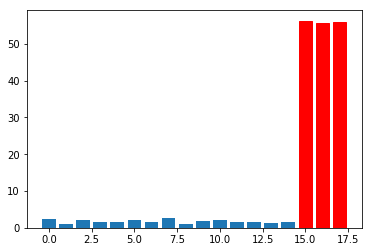

In [43]:
# ensemble of trees for polynomial features
_, result, _, _ = train_tree_n_times(X_poly, df['class'],n=1000,max_depth=None)
barlist = plt.bar(range(18),100*np.mean(result, axis=0))
for i in range(3):
    barlist[-3+i].set_color('r')

In [44]:
y_pred = np.zeros(X.shape[0])
for c in clf:
    y_pred += c.predict(X)
y_pred[df['class']]

array([988., 847., 961., 971., 855., 962., 877., 575., 907.])